## OpenCV DNN based Face Detection and Recognition

Face Detection: [YuNet](https://github.com/opencv/opencv_zoo/tree/master/models/face_detection_yunet)

Face Recognition: [SFace: Sigmoid-Constrained Hypersphere Loss for Robust Face Recognition](https://github.com/opencv/opencv_zoo/tree/master/models/face_recognition_sface)

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/d1f0zadon1ffpue/AADTRTxWKD501zizH6vaaTORa?dl=1 -O code.zip -q --show-progress
    !unzip -qq code.zip
    !pip install --upgrade opencv-contrib-python
else:
    pass

code.zip            100%[===================>]  38.57M  59.6MB/s    in 0.6s    
mapname:  conversion of  failed
     |████████████████████████████████| 66.7 MB 16 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

 Note that there are few changes in 4.5.5. The notebook may not work with other versions of OpenCV.

### Constants

In [4]:
# Similarity thresholds.
cosine_similarity_thresh = 0.363
l2_similarity_thresh = 1.128

# Initializations parameters.
score_threshold = 0.9
nms_threshold = 0.3
top_k = 5000

# Colors.
blue = (255, 0, 0)
green = (0, 255, 0)
red = (0, 0, 255)
yellow = (0, 255, 255)
cyan = (255, 0, 255)

### Display Detections Function

In [5]:
def display_detections(im, faces, radius=2, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):           
            coords = face[:-1].astype(np.int32)
            tlc = (coords[0], coords[1])
            brc = (coords[0]+coords[2], coords[1]+coords[3])
            cv2.rectangle(im, tlc, brc, green, thickness)
            cv2.circle(im, (coords[4], coords[5]), radius, blue, -1)
            cv2.circle(im, (coords[6], coords[7]), radius, red, -1)
            cv2.circle(im, (coords[8], coords[9]), radius, green, -1)
            cv2.circle(im, (coords[10], coords[11]), radius, cyan, -1)
            cv2.circle(im, (coords[12], coords[13]), radius, yellow, -1)
    return im

### Extract Features Function

In [6]:
def extractFeatures(img):
    # Image size.
    img_height, img_width = img.shape[:2]
    # Set detector input size.
    detector.setInputSize((img_width, img_height))
    # Perform detection.
    faces = detector.detect(img)
    # Align and crop faces.
    face_align = recognizer.alignCrop(img, faces[1][0])
    # Extract features.
    face_features = recognizer.feature(face_align)
    
    return faces, face_align, face_features

### Print Result

In [7]:
def results(cos, l2):
    if (cos >= cosine_similarity_thresh):
        text = "Same Person"
    else:
        text = "Different Person"

    print('Cosine Similarity Method : {}'.format(text))
    print('Threshold : ', cosine_similarity_thresh)
    print('Cosine score : ', round(cos, 4))


    if(l2 <= l2_similarity_thresh):
        text = "Same Person"
    else:
        text = "Different Person"

    print('\n')
    print('l2 Similarity Method : {}'.format(text))
    print('Threshold : ', l2_similarity_thresh)
    print('l2 score : ', round(l2, 4))

### Initialization
Create Detector and Recognizer objects using the following syntax.

In [8]:
# Model paths.
face_detection_model = 'face_detection_yunet_2021dec.onnx'
face_recognition_model = 'face_recognition_sface_2021dec.onnx'

# Detector.
detector = cv2.FaceDetectorYN.create(face_detection_model, "", (320, 320), score_threshold, nms_threshold, top_k)

# Recognizer.
recognizer = cv2.FaceRecognizerSF.create(face_recognition_model, "")

### Test1 : Elon Musk

In [9]:
# Load images for comparison.
img1 = cv2.imread("musk1.jpg")
img2 = cv2.imread("musk2.jpg")

# Get height and width.
img1_height, img1_width = img1.shape[:2]
img2_height, img2_width = img2.shape[:2]

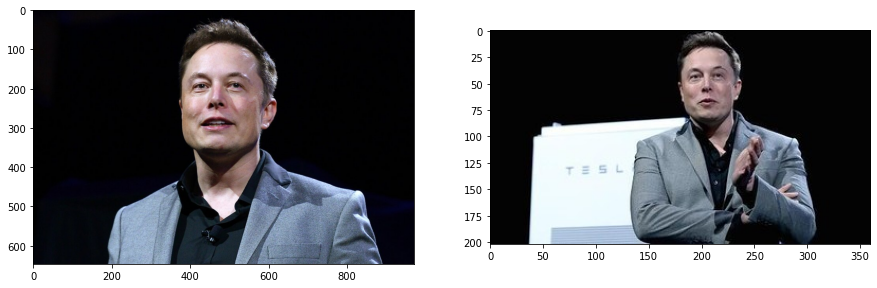

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img1[...,::-1]);
plt.subplot(122); plt.imshow(img2[...,::-1]);

### Processing
The image is processed in three stesp.
 - Detect face
 - Align and crop face
 - Extract features

In [11]:
faces1, face_align1, face1_features = extractFeatures(img1)

In [12]:
faces2, face_algn2, face2_features = extractFeatures(img2)

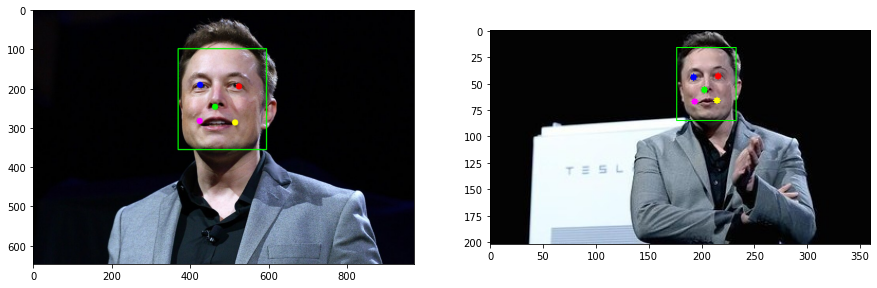

In [13]:
imgA = display_detections(img1.copy(), faces1, 8, 2)
imgB = display_detections(img2.copy(), faces2, 3, 1)
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(imgA[...,::-1]);
plt.subplot(122); plt.imshow(imgB[...,::-1]);

### Match Features
We are using two pre-defined methods for matching.
 - Cosine similiarity method
 - l2 similarity method
 
For cosine score, higher value means higher similarity. The maximum value can be 1.0. On the other hand, lower l2 score means higher similarity. Minimum value is 0.0.

In [14]:
cosine_score = recognizer.match(face1_features, face2_features, cv2.FaceRecognizerSF_FR_COSINE)
l2_score = recognizer.match(face1_features, face2_features, cv2.FaceRecognizerSF_FR_NORM_L2)

### Result

In [15]:
results(cosine_score, l2_score)

Cosine Similarity Method : Same Person
Threshold :  0.363
Cosine score :  0.8404


l2 Similarity Method : Same Person
Threshold :  1.128
l2 score :  0.565


### Test2 : Elon Musk and Jeff Bezos

In [16]:
img2 = cv2.imread('jeff1.jpg')

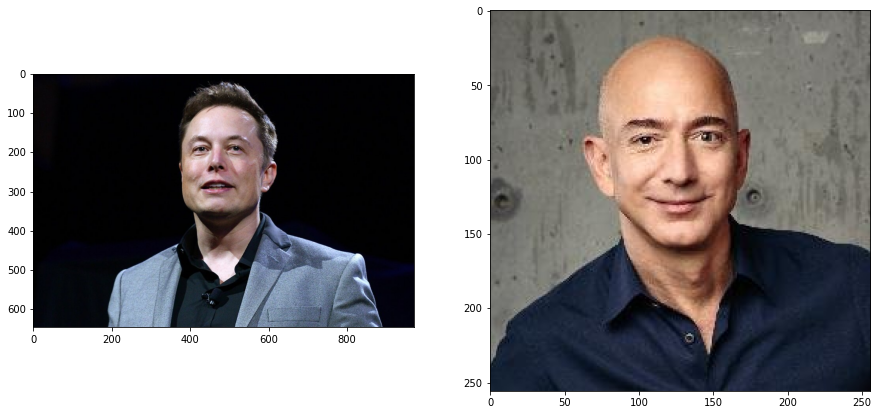

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(img1[...,::-1]);
plt.subplot(122); plt.imshow(img2[...,::-1]);

In [18]:
faces1, face_align1, face1_features = extractFeatures(img1)
faces2, face_align2, face2_features = extractFeatures(img2)

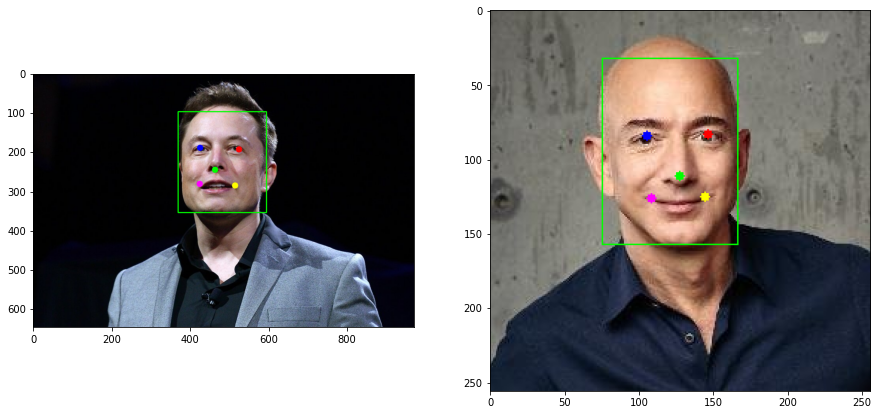

In [19]:
imgA = display_detections(img1.copy(), faces1, 8, 2)
imgB = display_detections(img2.copy(), faces2, 3, 1)
plt.figure(figsize=(15,10))
plt.subplot(121); plt.imshow(imgA[...,::-1]);
plt.subplot(122); plt.imshow(imgB[...,::-1]);

In [20]:
cosine_score = recognizer.match(face1_features, face2_features, cv2.FaceRecognizerSF_FR_COSINE)
l2_score = recognizer.match(face1_features, face2_features, cv2.FaceRecognizerSF_FR_NORM_L2)

In [21]:
results(cosine_score, l2_score)

Cosine Similarity Method : Different Person
Threshold :  0.363
Cosine score :  0.2117


l2 Similarity Method : Different Person
Threshold :  1.128
l2 score :  1.2556
